In [12]:
import pandas as pd 
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import scipy.stats as st

# Data Understanding :
# 1) Data Exploration
## importing 'telco training' dataset


In [13]:
data = pd.read_csv('/content/sample_data/training.csv')
data.head()

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,C100000,zero,660.000000,19995.0,0,0,897338.0,False,4,3,160.0,155,1,1.2,15,very_unsat,little,considering,STAY
1,C100001,one,317.647059,31477.0,155,15,393396.0,True,0,1,100.0,245,27,2.7,4,unsat,little,considering,LEAVE
2,C100006,zero,208.695652,66742.0,0,13,937197.0,False,4,2,127.0,493,20,2.6,4,avg,very_little,considering,STAY
3,C100008,zero,265.017668,40864.0,183,0,986430.0,False,3,3,86.0,390,13,2.5,12,unsat,very_high,considering,LEAVE
4,C100010,one,440.000000,43321.5,200,0,394622.0,True,2,3,77.0,175,18,2.4,10,very_unsat,little,actively_looking_into_it,LEAVE


In [14]:
data.shape

(11981, 19)

#### The dataset is composed of 11981 rows and 19 columns, the column types go as following :

In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11981 entries, 0 to 11980
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CUSTOMER_ID                  11981 non-null  object 
 1   COLLEGE                      11981 non-null  object 
 2   DATA                         11981 non-null  float64
 3   INCOME                       11981 non-null  float64
 4   OVERCHARGE                   11981 non-null  int64  
 5   LEFTOVER                     11981 non-null  int64  
 6   HOUSE                        11346 non-null  float64
 7   LESSTHAN600k                 11346 non-null  object 
 8   CHILD                        11981 non-null  int64  
 9   JOB_CLASS                    11981 non-null  int64  
 10  REVENUE                      11981 non-null  float64
 11  HANDSET_PRICE                11981 non-null  int64  
 12  OVER_15MINS_CALLS_PER_MONTH  11981 non-null  int64  
 13  TIME_CLIENT     


## Missing values : 

In [16]:
data.isnull().sum()

CUSTOMER_ID                      0
COLLEGE                          0
DATA                             0
INCOME                           0
OVERCHARGE                       0
LEFTOVER                         0
HOUSE                          635
LESSTHAN600k                   635
CHILD                            0
JOB_CLASS                        0
REVENUE                          0
HANDSET_PRICE                    0
OVER_15MINS_CALLS_PER_MONTH      0
TIME_CLIENT                      0
AVERAGE_CALL_DURATION            0
REPORTED_SATISFACTION            0
REPORTED_USAGE_LEVEL             0
CONSIDERING_CHANGE_OF_PLAN       0
CHURNED                          0
dtype: int64

#### We have 635 missing values for the  HOUSE and LESSTHAN600K features

## Exploring categorical features and their different values :

In [17]:
for i in data.columns:
    if len( data[i].unique()) < 1000 :
        print(data[i].name,' ',data[i].unique(),'length : ',len( data[i].unique()))

COLLEGE   ['zero' 'one'] length :  2
OVERCHARGE   [  0 155 183 200 168 179 204  42  47 209  62  34  65  54 160 201  88 219
 173  71 245  63  83  56 171  51  66 223 191  61  32 187 161 181  90 226
 218 221  86  27  85  46  59 186 197 167 207 210  72  52  64 177  44 217
 166 236 220  69  77  81  70 169 182  39  57 248  84  50 230 232  58  76
  67 144 202 224 163  79 206  45 153 141  38 162  33 213  31 244  74 198
  36 205 184 194 101 164  68  55  41 178 227 222 214 176  28 241 190 271
  87 216  92 188  60 235 165 154 159 253  78  40 212 175 139  48 196 208
  53 269 172  26 284 189  37 228  73 174  43  96  49  75 266 199 215 185
 251 143 193 211 260  80  89 233  24 195 146  95 237 225 229 118 239 180
 151 142 242 129 147  97 134 257 156 231 137 240  35  91 254  82 263 152
 277  93 203 122  29 252 192 234 149 157 133 136  30  98 105 243 261 249
 264 258 145 170 158 132  13 278 238 290  15  22  94 106  23 100 246 140
 250 247 123 265 107  19 150 267 128  17 126  20 262 256 131  18 138 109
 

## Histogram plots on some features based on churn value

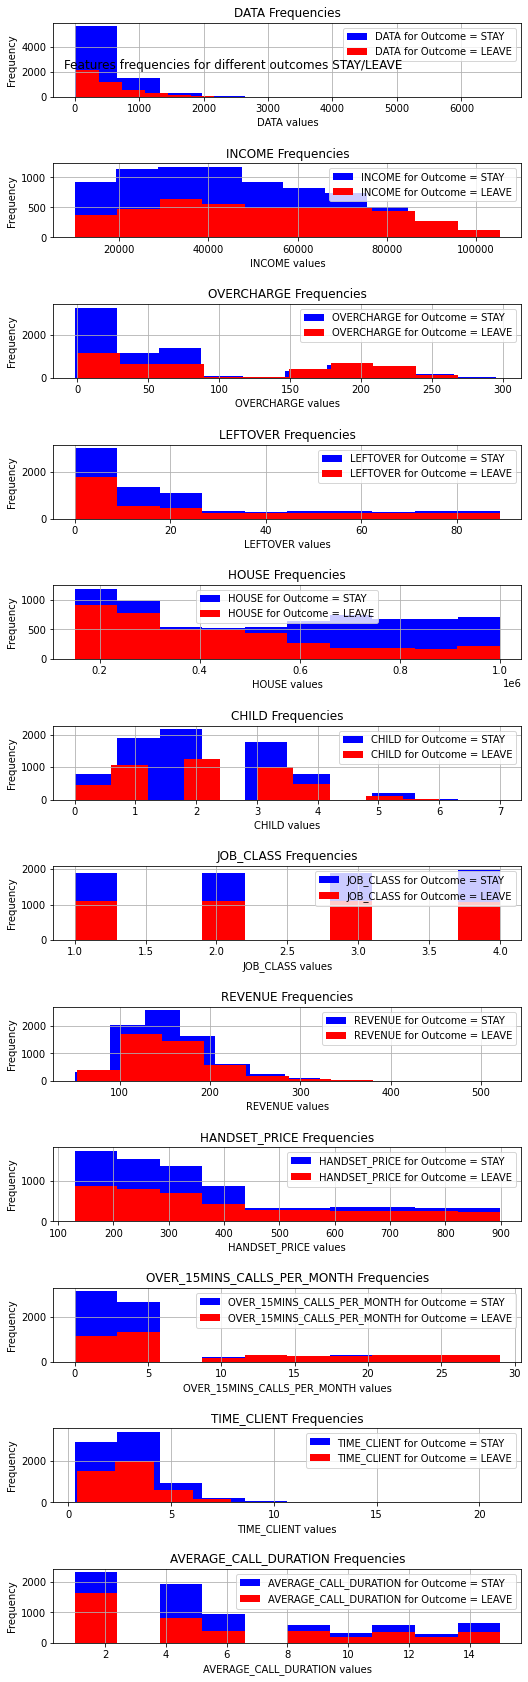

In [18]:
#Preparing plot


rcParams['figure.figsize'] = 10, 25

outcome_0=data[data['CHURNED']=='STAY']
outcome_1=data[data['CHURNED']=='LEAVE']
names=[]
for i in data.columns:
    if not((isinstance(data[i][1],str))) and (i != 'CHURNED') and (i != 'LESSTHAN600k') :
        names.append(i)


    # init figure
fig, axs = plt.subplots(len(names), 1)
fig.suptitle('Features frequencies for different outcomes STAY/LEAVE')
plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 1, wspace = 0.2, hspace = 0.9)

for i in data.columns:
    if not((isinstance(data[i][1],str))):
        if(i != 'CHURNED') and (i != 'LESSTHAN600k') :
            ax = axs[names.index(i)]
        
            outcome_0[i].plot(kind='hist',  subplots=True, ax=ax,
                                    sharex=False, color="blue", legend=True,
                                    label=i + ' for Outcome = STAY')
            outcome_1[i].plot(kind='hist',  subplots=True, ax=ax,
                                     sharex=False, color="red", legend=True,
                                     label=i + ' for Outcome = LEAVE')
            ax.set_xlabel(i + ' values')
            ax.set_title(i + ' Frequencies')
            ax.grid('on')
            fig.savefig('Frequencies.png')
           
        
plt.show()   

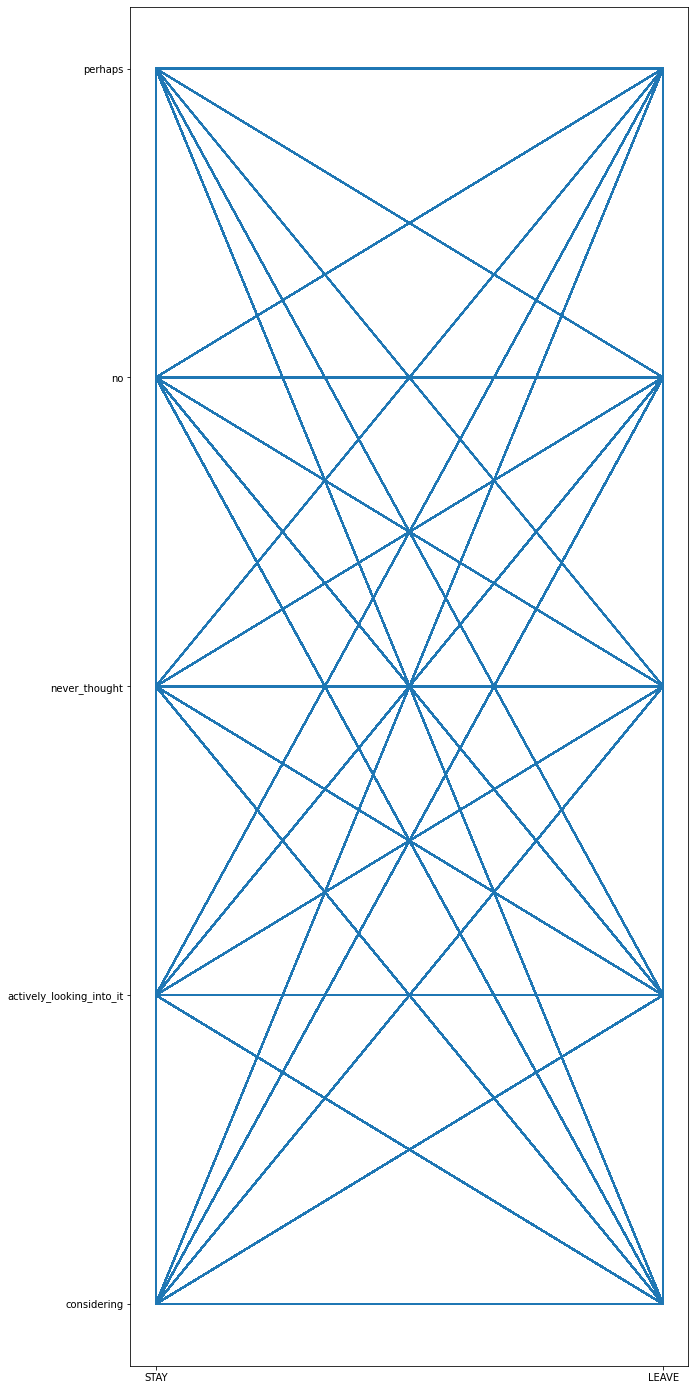

In [19]:
fig4, ax1 = plt.subplots()
plt.subplot()
plt.plot(data['CHURNED'] , data['CONSIDERING_CHANGE_OF_PLAN'] )  # à revoir!!


## Percentage of churners to no churners

Churn :  4369 //  No churn :  7612


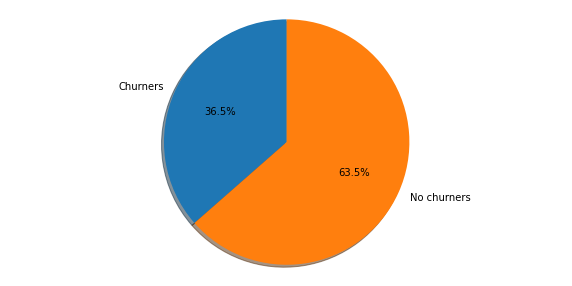

In [20]:
rcParams['figure.figsize'] = 10, 5
print('Churn : ',outcome_1['CONSIDERING_CHANGE_OF_PLAN'].size,'//',' No churn : ',outcome_0['CONSIDERING_CHANGE_OF_PLAN'].size)
fracs=[outcome_1['CONSIDERING_CHANGE_OF_PLAN'].size/data['CONSIDERING_CHANGE_OF_PLAN'].size,outcome_0['CONSIDERING_CHANGE_OF_PLAN'].size/data['CONSIDERING_CHANGE_OF_PLAN'].size]
labels=['Churners','No churners']
fig1, ax1 = plt.subplots()
ax1.pie(fracs, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.savefig('/content/sample_data/pics/'+'Churners'+'.png')
plt.show()

####  Result : from 11981 clients, only 4369 are churners. They are our main focus but only represent 36.5% of the total data. This is considered undersampling.

## CONSIDERING_CHANGE_OF_PLAN and REPORTED_SATISFACTION Columns

In [21]:
print(outcome_1.describe(include='all'))
print(outcome_0.describe(include='all'))
# This gives us the opinion of the clients which has the highest churns which is very_unsat and considering (same for no churn)



       CUSTOMER_ID COLLEGE         DATA         INCOME   OVERCHARGE  \
count         4369    4369  4369.000000    4369.000000  4369.000000   
unique        4369       2          NaN            NaN          NaN   
top        C100001     one          NaN            NaN          NaN   
freq             1    2201          NaN            NaN          NaN   
mean           NaN     NaN   536.061081   52582.809911   104.433738   
std            NaN     NaN   454.332995   23589.114729    88.254086   
min            NaN     NaN    23.830538   10057.500000     0.000000   
25%            NaN     NaN   209.790210   33562.500000     0.000000   
50%            NaN     NaN   389.078498   50966.000000    71.000000   
75%            NaN     NaN   716.981132   72001.000000   193.000000   
max            NaN     NaN  3600.000000  105355.500000   298.000000   

           LEFTOVER          HOUSE LESSTHAN600k        CHILD    JOB_CLASS  \
count   4369.000000    4145.000000         4145  4369.000000  4369.000

Number of unique reports : 5


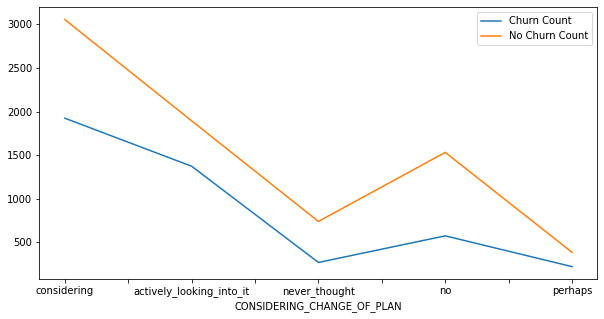

In [22]:
dictCONSIDERING_CHANGE_OF_PLAN={'CONSIDERING_CHANGE_OF_PLAN':[],
         'Churn Count':[],
          'No Churn Count':[]
         }
print("Number of unique reports :",data["CONSIDERING_CHANGE_OF_PLAN"].unique().size)
for c in data["CONSIDERING_CHANGE_OF_PLAN"].unique():
    #print(c,"Count :",outcome_1["CONSIDERING_CHANGE_OF_PLAN"][outcome_1["CONSIDERING_CHANGE_OF_PLAN"]==c].size)
    dictCONSIDERING_CHANGE_OF_PLAN['CONSIDERING_CHANGE_OF_PLAN'].append(c)
    
    dictCONSIDERING_CHANGE_OF_PLAN['Churn Count'].append(outcome_1["CONSIDERING_CHANGE_OF_PLAN"][outcome_1["CONSIDERING_CHANGE_OF_PLAN"]==c].size)
    dictCONSIDERING_CHANGE_OF_PLAN['No Churn Count'].append(outcome_0["CONSIDERING_CHANGE_OF_PLAN"][outcome_0["CONSIDERING_CHANGE_OF_PLAN"]==c].size)
 
dfCONSIDERING_CHANGE_OF_PLAN=pd.DataFrame(data=dictCONSIDERING_CHANGE_OF_PLAN)
dfCONSIDERING_CHANGE_OF_PLAN.plot(x='CONSIDERING_CHANGE_OF_PLAN')
plt.show()

Number of unique reports : 5


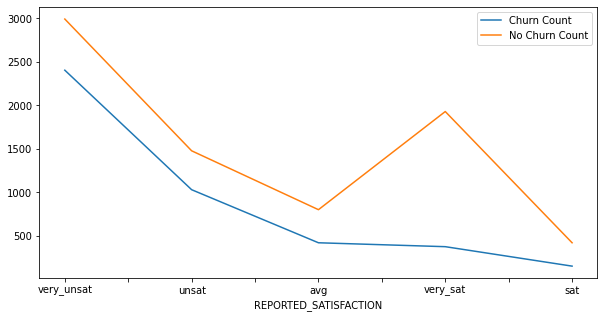

In [23]:
dictREPORTED_SATISFACTION={'REPORTED_SATISFACTION':[],
         'Churn Count':[],
          'No Churn Count':[]
         }
print("Number of unique reports :",data["REPORTED_SATISFACTION"].unique().size)
for c in data["REPORTED_SATISFACTION"].unique():
    #print(c,"Count :",outcome_1["REPORTED_SATISFACTION"][outcome_1["REPORTED_SATISFACTION"]==c].size)
    dictREPORTED_SATISFACTION['REPORTED_SATISFACTION'].append(c)
    
    dictREPORTED_SATISFACTION['Churn Count'].append(outcome_1["REPORTED_SATISFACTION"][outcome_1["REPORTED_SATISFACTION"]==c].size)
    dictREPORTED_SATISFACTION['No Churn Count'].append(outcome_0["REPORTED_SATISFACTION"][outcome_0["REPORTED_SATISFACTION"]==c].size)
 
dfREPORTED_SATISFACTION=pd.DataFrame(data=dictREPORTED_SATISFACTION)
dfREPORTED_SATISFACTION.plot(x='REPORTED_SATISFACTION')
plt.show()

## Figures for binary categorical features

In [24]:
def pieBinary(colname,colvalues,labels):
    collegeSTAY = outcome_0[colname][outcome_0[colname]==colvalues[0]].shape[0] / data.shape[0] 
    nocollegeSTAY = outcome_0[colname][outcome_0[colname]==colvalues[1]].size / data.shape[0] 
    collegeLEAVE = outcome_1[colname][outcome_1[colname]==colvalues[0]].shape[0] / data.shape[0]
    nocollegeLEAVE = outcome_1[colname][outcome_1[colname]==colvalues[1]].shape[0] / data.shape[0]

    fracs=[collegeSTAY,nocollegeSTAY, collegeLEAVE,nocollegeLEAVE]


    fig1, ax1 = plt.subplots()
    ax1.pie(fracs, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    fig1.savefig('/content/sample_data/pics'+colname+'.png')
    plt.show()

## Statistics for binary columns

In [25]:
def stat2(col,choice):
    print(choice[0],' no churners :',outcome_0[col][outcome_0[col]==choice[0]].size)
    print(choice[1],'no churners :',outcome_0[col][outcome_0[col]==choice[1]].size)
    print(choice[0], 'churners :',outcome_1[col][outcome_1[col]==choice[0]].size)
    print(choice[1],' chuners :',outcome_1[col][outcome_1[col]==choice[1]].size)
    

## Pie charts for binary columns : 

zero  no churners : 3844
one no churners : 3768
zero churners : 2168
one  chuners : 2201


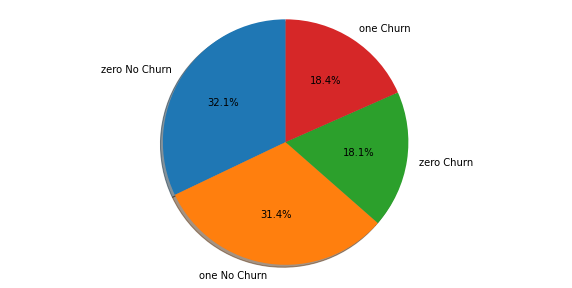

In [26]:
stat2('COLLEGE',['zero','one'])
labels=['zero No Churn','one No Churn','zero Churn','one Churn']
pieBinary('COLLEGE',['zero','one'],labels)
#The COLLEGE column has no effect

####  Result : The COLLEGE column has no effect  

## Figures for features with three values

In [27]:
def triplePie(colname,colvalues):
    oneNO = outcome_0[colname][outcome_0[colname]==colvalues[0]].shape[0] / data.shape[0] 
    twoNO = outcome_0[colname][outcome_0[colname]==colvalues[1]].size / data.shape[0] 
    threeNO = outcome_0[colname][outcome_0[colname]==colvalues[2]].size / data.shape[0] 
    
    oneYES = outcome_1[colname][outcome_1[colname]==colvalues[0]].shape[0] / data.shape[0]
    twoYES = outcome_1[colname][outcome_1[colname]==colvalues[1]].shape[0] / data.shape[0]
    threeYES = outcome_1[colname][outcome_1[colname]==colvalues[2]].shape[0] / data.shape[0]

    fracs=[oneNO,twoNO, threeNO,oneYES,twoYES,threeYES]

    labels=['No churn '+colvalues[0],'No churn '+colvalues[1],'No churn '+colvalues[2],
           ' churn '+colvalues[0],' churn '+colvalues[1],' churn '+colvalues[2]]
    fig1, ax1 = plt.subplots()
    ax1.pie(fracs, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    fig1.savefig('/content/sample_data/pics'+colname+'.png')
    plt.show()

## Statistics for categorical columns with 3 values

In [28]:
def stat3(col,choice):
    print(choice[0],' no churners :',outcome_0[col][outcome_0[col]==choice[0]].size)
    print(choice[1],'no churners :',outcome_0[col][outcome_0[col]==choice[1]].size)
    print(choice[2],'no churners :',outcome_0[col][outcome_0[col]==choice[2]].size)
    print(choice[0], 'churners :',outcome_1[col][outcome_1[col]==choice[0]].size)
    print(choice[1],' chuners :',outcome_1[col][outcome_1[col]==choice[1]].size)
    print(choice[2],' chuners :',outcome_1[col][outcome_1[col]==choice[2]].size)


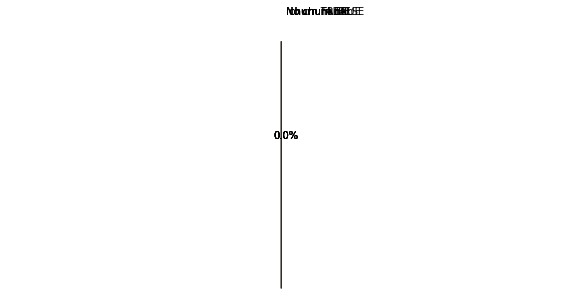

FALSE  no churners : 0
TRUE no churners : 0
nan no churners : 0
FALSE churners : 0
TRUE  chuners : 0
nan  chuners : 0


In [29]:
triplePie('LESSTHAN600k',['FALSE','TRUE','nan'])
stat3('LESSTHAN600k',['FALSE','TRUE','nan'])

#à revoir !!!

## Figures for features with four values

In [30]:
def quadPie(colname,colvalues):

    oneYES = outcome_1[colname][outcome_1[colname]==colvalues[0]].shape[0] / outcome_1.shape[0]
    twoYES = outcome_1[colname][outcome_1[colname]==colvalues[1]].shape[0] / outcome_1.shape[0]
    threeYES = outcome_1[colname][outcome_1[colname]==colvalues[2]].shape[0] / outcome_1.shape[0]
    fourYES=outcome_1[colname][outcome_1[colname]==colvalues[3]].shape[0] / outcome_1.shape[0]
    fracs=[oneYES,twoYES,threeYES,fourYES]

    labels=[' churn '+colvalues[0],' churn '+colvalues[1],' churn '+colvalues[2],' churn '+colvalues[3]]
    fig1, ax1 = plt.subplots()
    ax1.pie(fracs, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    fig1.savefig('/content/sample_data/pics'+colname+'.png')
    plt.show()

## Statistics for features with 4 values

In [31]:
#churners
def stat4(col,choice):
    print(choice[0],' no churners :',outcome_0[col][outcome_0[col]==choice[0]].size)
    print(choice[1],'no churners :',outcome_0[col][outcome_0[col]==choice[1]].size)
    print(choice[2],'no churners :',outcome_0[col][outcome_0[col]==choice[2]].size)
    print(choice[3],'no churners :',outcome_0[col][outcome_0[col]==choice[3]].size)
   
    print(choice[0], 'churners :',outcome_1[col][outcome_1[col]==choice[0]].size)
    print(choice[1],' chuners :',outcome_1[col][outcome_1[col]==choice[1]].size)
    print(choice[2],' chuners :',outcome_1[col][outcome_1[col]==choice[2]].size)
    print(choice[3],' chuners :',outcome_1[col][outcome_1[col]==choice[3]].size)



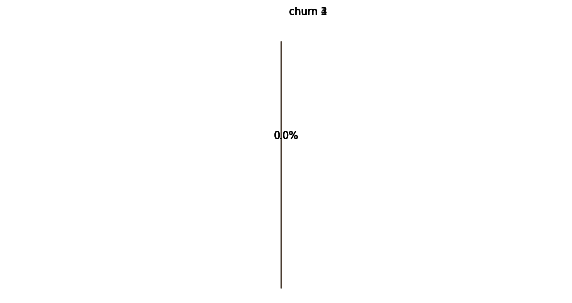

In [32]:
quadPie('JOB_CLASS',['3', '1' ,'2', '4'])

#à revoir!!!

## Figures for features with five values

In [33]:
def fivePie(colname,colvalues):

    oneYES = outcome_1[colname][outcome_1[colname]==colvalues[0]].shape[0] / outcome_1.shape[0]
    twoYES = outcome_1[colname][outcome_1[colname]==colvalues[1]].shape[0] / outcome_1.shape[0]
    threeYES = outcome_1[colname][outcome_1[colname]==colvalues[2]].shape[0] / outcome_1.shape[0]
    fourYES=outcome_1[colname][outcome_1[colname]==colvalues[3]].shape[0] / outcome_1.shape[0]
    fiveYES=outcome_1[colname][outcome_1[colname]==colvalues[4]].shape[0] / outcome_1.shape[0]
    fracs=[oneYES,twoYES,threeYES,fourYES,fiveYES]

    labels=[' churn '+colvalues[0],' churn '+colvalues[1],' churn '+colvalues[2],' churn '+colvalues[3],' churn '+colvalues[4]]
    fig1, ax1 = plt.subplots()
    ax1.pie(fracs, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    fig1.savefig('/content/sample_data/pics'+colname+'.png')
    plt.show()

## Statistics for categorical columns with 5 values

In [34]:
#churners
def stat5(col,choice):
    print(choice[0],' no churners :',outcome_0[col][outcome_0[col]==choice[0]].size)
    print(choice[1],'no churners :',outcome_0[col][outcome_0[col]==choice[1]].size)
    print(choice[2],'no churners :',outcome_0[col][outcome_0[col]==choice[2]].size)
    print(choice[3],'no churners :',outcome_0[col][outcome_0[col]==choice[3]].size)
    print(choice[4],'no churners :',outcome_0[col][outcome_0[col]==choice[4]].size)
   
    print(choice[0], 'churners :',outcome_1[col][outcome_1[col]==choice[0]].size)
    print(choice[1],' chuners :',outcome_1[col][outcome_1[col]==choice[1]].size)
    print(choice[2],' chuners :',outcome_1[col][outcome_1[col]==choice[2]].size)
    print(choice[3],' chuners :',outcome_1[col][outcome_1[col]==choice[3]].size)
    print(choice[4],' chuners :',outcome_1[col][outcome_1[col]==choice[4]].size)


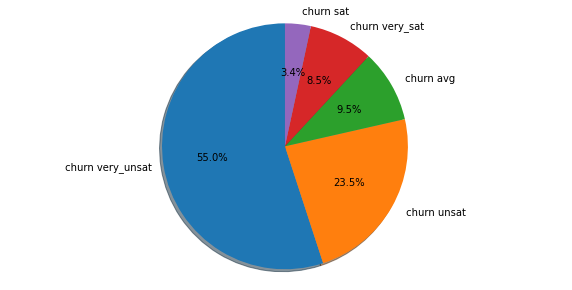

very_unsat  no churners : 2993
unsat no churners : 1476
avg no churners : 798
very_sat no churners : 1928
sat no churners : 417
very_unsat churners : 2404
unsat  chuners : 1028
avg  chuners : 417
very_sat  chuners : 372
sat  chuners : 148


In [35]:
fivePie('REPORTED_SATISFACTION',['very_unsat','unsat','avg','very_sat','sat'])
stat5('REPORTED_SATISFACTION',['very_unsat','unsat','avg','very_sat','sat'])

####Result : people with 'very unstisfied' report churn more

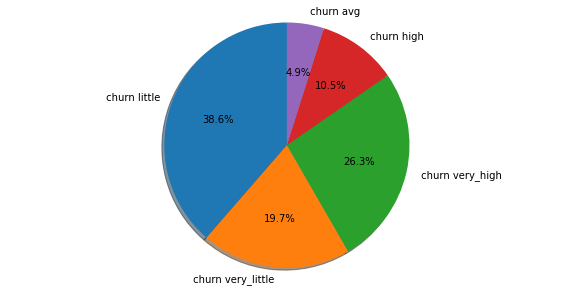

In [36]:
fivePie('REPORTED_USAGE_LEVEL',['little','very_little','very_high','high','avg'])

####Result : people with 'little and very little usage' report churn more

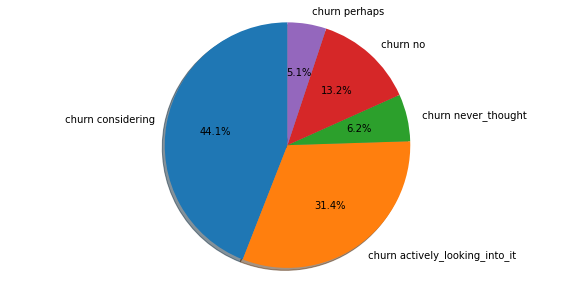

In [37]:
fivePie('CONSIDERING_CHANGE_OF_PLAN',['considering','actively_looking_into_it','never_thought','no','perhaps'])

####Result : people 'considering and actively looking into change of plan' report churn more

##### Generally speaking, people with low usage and low satisfaction churn more

#  Data Cleaning


In [38]:
#SMOTE
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN
#Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#Missing values
from sklearn.impute import SimpleImputer
#Scaling 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,MinMaxScaler,PowerTransformer,Normalizer,MaxAbsScaler

#Variance
import statistics 


#Modeling
from sklearn.model_selection import GridSearchCV,validation_curve
from sklearn.metrics import plot_confusion_matrix,roc_curve,roc_auc_score, classification_report,auc,precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
import xgboost as xgb
from sklearn import svm
from sklearn.linear_model import LogisticRegression 
from lightgbm import LGBMClassifier


## Dependency test between categorical features and our target

In [39]:
def contingency(X):
    Y= "CHURNED"
   

    
    #Contingency table : for each value of Y, the respective total of X
    cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

    
    print('Feature : ',X)
    #Chi2 stat, we only need the p_value and the independency table which are st_p and st_exp
    st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
    print("P value = ",st_p)
    if(st_p>0.01):
        print('P-value > alpha : H0 variables independent, we can remove this column')
    else:
        print('P-Value < alpha : H1 ')
    
    
    indep=st_exp
    
    #The chi2 independency test relies on comparing the observed values against the expected ones with the following coefficient
    
    #coef = (n(i,j) - f(i)*n(j))² / (f(i)*n((j)))
    #the pvalue is the sum of that coefficient
    c = cont.fillna(0) # Replace null values with 0
    measure = (c-indep)**2/indep
    #For the heatmap, we divide the coeficients over total N 
    xi_n = measure.sum().sum() 
    table = measure/xi_n
    rcParams['figure.figsize'] = 7, 3
    sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1],fmt="d")
    
    plt.show()
    
    

Feature :  COLLEGE
P value =  0.9311015194401894
P-value > alpha : H0 variables independent, we can remove this column


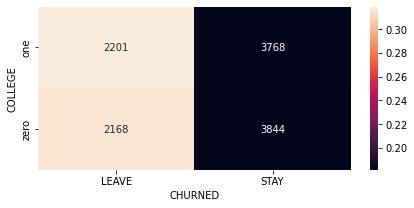

Feature :  LESSTHAN600k
P value =  2.200649875788807e-136
P-Value < alpha : H1 


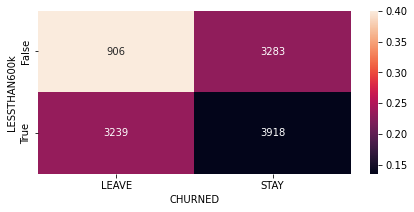

Feature :  JOB_CLASS
P value =  0.8934026979148487
P-value > alpha : H0 variables independent, we can remove this column


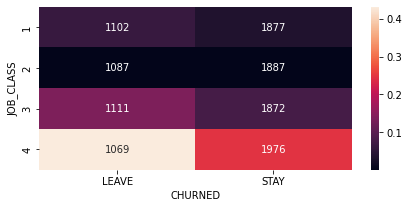

Feature :  REPORTED_SATISFACTION
P value =  5.610261201439476e-125
P-Value < alpha : H1 


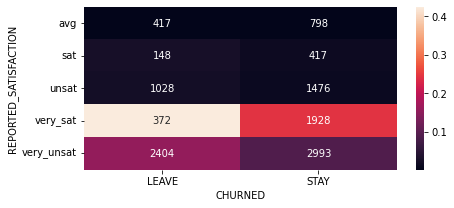

Feature :  REPORTED_USAGE_LEVEL
P value =  0.991308785604982
P-value > alpha : H0 variables independent, we can remove this column


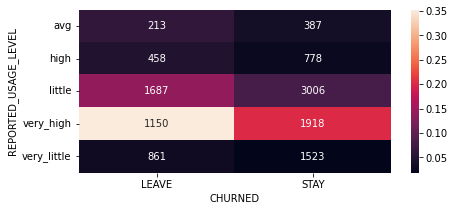

Feature :  CONSIDERING_CHANGE_OF_PLAN
P value =  1.5608860488578707e-31
P-Value < alpha : H1 


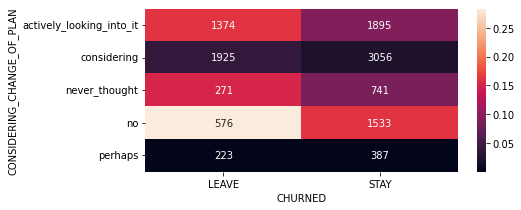

In [40]:
colqual=[ 'COLLEGE', 'LESSTHAN600k', 'JOB_CLASS', 'REPORTED_SATISFACTION',
        'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']
for i in colqual :
    contingency(i)

## Correlation between numerical features and our target

## Testing the correlation between the remaining features and our target

(11981,)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

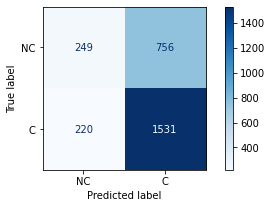

Le train score est : 0.6517073170731708
Le test score est : 0.6458635703918723
              precision    recall  f1-score   support

       LEAVE     0.5309    0.2478    0.3379      1005
        STAY     0.6694    0.8744    0.7583      1751

    accuracy                         0.6459      2756
   macro avg     0.6002    0.5611    0.5481      2756
weighted avg     0.6189    0.6459    0.6050      2756



In [41]:
#num qual analysis




dq=data.copy()

dcor=dq.loc[:,['TIME_CLIENT','REVENUE','OVERCHARGE','LEFTOVER','CHILD','JOB_CLASS','HANDSET_PRICE','OVER_15MINS_CALLS_PER_MONTH','AVERAGE_CALL_DURATION']]




Yq=dq.loc[:,'CHURNED'].values
dq=dq.drop(columns='CHURNED')
Xq=dq.loc[:,['TIME_CLIENT','REVENUE','OVERCHARGE','LEFTOVER','CHILD','JOB_CLASS','HANDSET_PRICE','OVER_15MINS_CALLS_PER_MONTH','AVERAGE_CALL_DURATION']].values

imputers=SimpleImputer(missing_values=np.NaN,strategy='mean')

Xq=imputers.fit_transform(Xq)
print(Yq.shape)
X_train, X_test, y_train, y_test = train_test_split(Xq, Yq, test_size=0.23,random_state=420,stratify=Yq)

model = LogisticRegression(random_state=0).fit(X_train, y_train)
model.fit( X_train, y_train)
plot_confusion_matrix(model, X_test, y_test, display_labels=['NC','C'], cmap=plt.cm.Blues)
plt.show()
print('Le train score est :', model.score(X_train, y_train))
print('Le test score est :', model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4,zero_division=0 ))


#### These features must remain

## Checking outliers

##### Outliers are data points that are far from other data points. In other words, they’re unusual values in a dataset. Outliers are problematic for many statistical analyses because they can cause tests to either miss significant findings or distort real results.

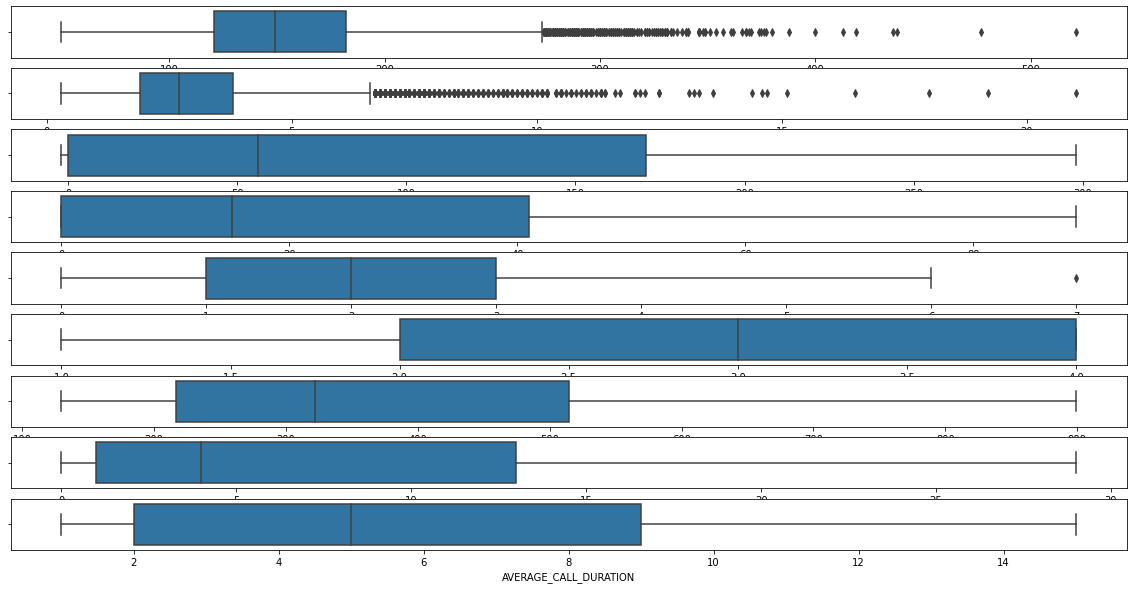

In [42]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(nrows = 9, figsize =(20, 10)) 
ax1 = sns.boxplot(x=dq.loc[:,"REVENUE"],ax=ax1)
ax2 = sns.boxplot(x=dq.loc[:,"TIME_CLIENT"],ax=ax2)
ax3 = sns.boxplot(x=dq.loc[:,"OVERCHARGE"],ax=ax3)
ax4 = sns.boxplot(x=dq.loc[:,"LEFTOVER"],ax=ax4)
ax5 = sns.boxplot(x=dq.loc[:,"CHILD"],ax=ax5)
ax6 = sns.boxplot(x=dq.loc[:,"JOB_CLASS"],ax=ax6)
ax7 = sns.boxplot(x=dq.loc[:,"HANDSET_PRICE"],ax=ax7)
ax8 = sns.boxplot(x=dq.loc[:,"OVER_15MINS_CALLS_PER_MONTH"],ax=ax8)
ax9 = sns.boxplot(x=dq.loc[:,"AVERAGE_CALL_DURATION"],ax=ax9)



#### Our data is not evenly distributed, outliers found

## 🤔 Total Charges

## Normality test

In [43]:
shapiro_test_1 = st.shapiro(dq.loc[:4999,"REVENUE"].values)
shapiro_test_2 = st.shapiro(dq.loc[:4999,"TIME_CLIENT"].values)
print("REVENUE p-value =",shapiro_test_1[1])
print("TIME_CLIENT p-value =",shapiro_test_2[1])



REVENUE p-value = 1.6089403148000695e-36
TIME_CLIENT p-value = 0.0


#### Both of our variables have a p-value < alpha (5%), so we accept H1 : the variables dont follow normal distribution 
##### We can confirm these results visually

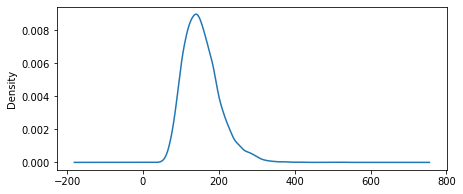

In [44]:
dq.loc[:4999,"REVENUE"].plot.kde()
plt.show()

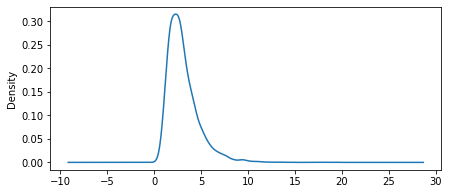

In [45]:
dq.loc[:4999,"TIME_CLIENT"].plot.kde()
plt.show()

## Variance test

In [46]:

sample =dq.loc[:4999,"REVENUE"].values

print("Variance of REVENUE is % s" 
      %(statistics.variance(sample))) 


sample =dq.loc[:4999,"TIME_CLIENT"].values

print("Variance of TIME_CLIENT is % s" 
      %(statistics.variance(sample)))

Variance of REVENUE is 2268.6524087217445
Variance of TIME_CLIENT is 2.7395137443488697


#### High variances

## Dropping columns



Droppping Irrelevant columns and columns that are not usefull in modeling and that may lead to overfitting.
So we dropped these  columns based on :
 - CUSTOMER_ID : unique value  for every entry
 - DATA : unique value  for every entry
 - INCOME : unique value  for every entry
 - HOUSE : unique value  for every entry
 - COLLEGE, JOB_CLASS, REPORTED_USAGE_LEVEL : Since they are independent from our target


 

In [47]:
data=data.drop(columns=['CUSTOMER_ID','DATA','INCOME','HOUSE','COLLEGE','JOB_CLASS','REPORTED_USAGE_LEVEL'])
#Reorder columns for rest of transofrmations

data=data[[ 'CHURNED',
           'REVENUE', 'TIME_CLIENT',
       
         'CONSIDERING_CHANGE_OF_PLAN', 'REPORTED_SATISFACTION', 'AVERAGE_CALL_DURATION',
        
       'OVER_15MINS_CALLS_PER_MONTH', 'HANDSET_PRICE', 'LESSTHAN600k',
       'LEFTOVER', 'OVERCHARGE']]

data.shape

(11981, 11)

#### Our remaining data consists only of 12 columns

## Data preparation 

In [48]:

#Main split
Y=data.loc[:,'CHURNED'].values
data=data.drop(columns='CHURNED')
X=data.loc[:,:].values

#Encoding
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse=False),slice(2,15))],remainder='passthrough')
X=np.array(ct.fit_transform(X))


#Missing values
imputer=SimpleImputer(missing_values=np.nan,strategy='constant')
X=imputer.fit_transform(X)
print(X.shape)


#rearranging data for scaling (only 3 columns to scale so we shift them to front)
l=list(np.arange(0,38))
l.insert(0,36)
l.insert(1,37)
l.pop()
l.pop()
X=X[:,l]

#SMOTE
ros=SMOTE(random_state=0)
X, Y = ros.fit_resample(X, Y)

#Splitting
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.26,random_state=420,stratify=Y)

#Scaling (must be done after splitting data)
Scaler=RobustScaler()

X_train[:,0:2]=Scaler.fit_transform(X_train[:,0:2])
X_test[:,0:2]=Scaler.transform(X_test[:,0:2])

(11981, 1172)


# Modeling 

## Confusion matrix and classification report 

In [49]:
def plot_confMatrix(model,X_train,y_train,X_test, y_test,name):    

    model.fit( X_train, y_train)
    plot_confusion_matrix(model, X_test, y_test, display_labels=['NC','C'], cmap=plt.cm.Blues)
    plt.show()
    
    print('Train score :', model.score(X_train, y_train))
    print('Test score  :', model.score(X_test, y_test))
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, digits=4 ))
    
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='LEAVE')
    print('Roc = ',roc_auc_score(y_test, y_pred_proba))

    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim(-0.01, 1)
    plt.ylim(0, 1)
    plt.plot(fpr, tpr, label=name)

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')

    plt.show()
    
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred,average='binary', pos_label='LEAVE')
    scores = pd.DataFrame(columns=['Precision','Recall','F1','ROC','Train Score','Test Score'])
    scores.loc[name] = [precision, recall, f1
                        ,roc_auc_score(y_test, y_pred_proba)
                        ,model.score(X_train, y_train)
                        ,model.score(X_test, y_test)]
    print('----------------------------------------')
    
    print(scores)
    return scores



In [50]:
#Storing result in a variable
all_scores = pd.DataFrame()

### KNN

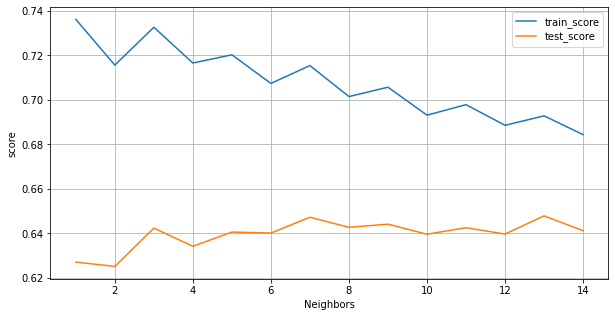

In [51]:
train_scores, test_scores= validation_curve(KNeighborsClassifier(),
                                            X_train, y_train, param_name='n_neighbors',
                                            param_range=np.arange(1,15), cv=5)
K=np.arange(1,15)
plt.figure(figsize=(10,5))
plt.plot(K, train_scores.mean(axis=1), K, test_scores.mean(axis=1))
plt.legend(('train_score', 'test_score'))
plt.xlabel('Neighbors')
plt.ylabel('score')
plt.grid(True)
plt.show()

In [52]:
param_grid = {'n_neighbors' : np.arange(5,15),
              'metric' : ['euclidean', 'manhattan','minkowski'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid , cv=5,n_jobs=-1)

grid.fit(X_train, y_train)
grid.best_params_
T1=grid.best_params_


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


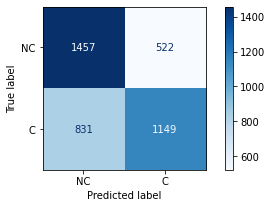

Train score : 0.7217931646693297
Test score  : 0.6582470320788077
              precision    recall  f1-score   support

       LEAVE     0.6368    0.7362    0.6829      1979
        STAY     0.6876    0.5803    0.6294      1980

    accuracy                         0.6582      3959
   macro avg     0.6622    0.6583    0.6562      3959
weighted avg     0.6622    0.6582    0.6562      3959

Roc =  0.699138045436681


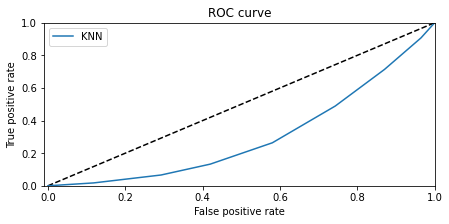

----------------------------------------
     Precision   Recall        F1       ROC  Train Score  Test Score
KNN   0.636801  0.73623  0.682915  0.699138     0.721793    0.658247


In [53]:

KNN = KNeighborsClassifier(n_neighbors=T1['n_neighbors']  ,metric=T1['metric'] ,algorithm=T1['algorithm'])
Res=plot_confMatrix(KNN,X_train,y_train,X_test, y_test,'KNN')

all_scores = all_scores.append(Res)

### Decision Tree

In [54]:
dt = DecisionTreeClassifier()
param_grid = {
              'criterion' : ['gini', 'entropy'],
              'splitter' : ['best', 'random'],
              'max_depth' : np.arange(1,15),              
             }
grid = GridSearchCV(dt, param_grid=param_grid , cv=5,n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_
T2=grid.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


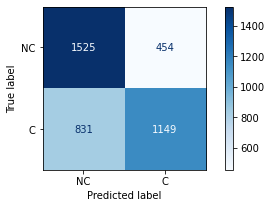

Train score : 0.7214380825565913
Test score  : 0.67542308663804
              precision    recall  f1-score   support

       LEAVE     0.6473    0.7706    0.7036      1979
        STAY     0.7168    0.5803    0.6414      1980

    accuracy                         0.6754      3959
   macro avg     0.6820    0.6754    0.6725      3959
weighted avg     0.6820    0.6754    0.6725      3959

Roc =  0.7213148411859882


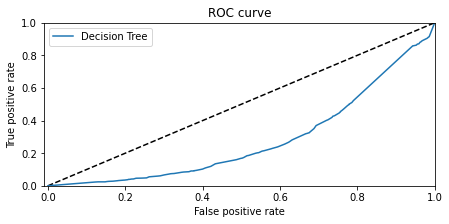

----------------------------------------
               Precision    Recall        F1       ROC  Train Score  \
Decision Tree   0.647284  0.770591  0.703576  0.721315     0.721438   

               Test Score  
Decision Tree    0.675423  


In [55]:

DT = DecisionTreeClassifier(criterion=T2['criterion']  ,splitter=T2['splitter'] ,max_depth=T2['max_depth'])
Res=plot_confMatrix(DT,X_train,y_train,X_test, y_test,'Decision Tree')
all_scores = all_scores.append(Res)

### Random Forest

In [56]:
RF = RandomForestClassifier()
param_grid = {
              'criterion' : ['gini', 'entropy'],             
              'max_depth' : np.arange(1,15),      
             }
grid = GridSearchCV(RF, param_grid=param_grid , cv=5,n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_
T3=grid.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


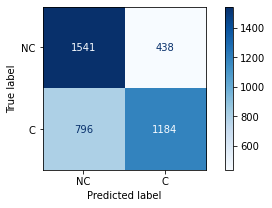

Train score : 0.7384820239680426
Test score  : 0.688305127557464
              precision    recall  f1-score   support

       LEAVE     0.6594    0.7787    0.7141      1979
        STAY     0.7300    0.5980    0.6574      1980

    accuracy                         0.6883      3959
   macro avg     0.6947    0.6883    0.6857      3959
weighted avg     0.6947    0.6883    0.6857      3959

Roc =  0.7535328014863134


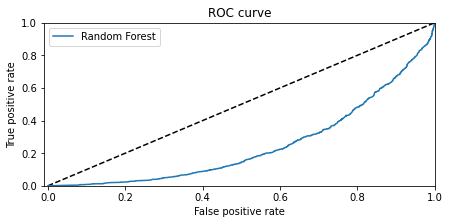

----------------------------------------
               Precision    Recall        F1       ROC  Train Score  \
Random Forest   0.659392  0.778676  0.714087  0.753533     0.738482   

               Test Score  
Random Forest    0.688305  


In [57]:

RF = RandomForestClassifier(criterion=T3['criterion'],max_depth=T3['max_depth'])
Res=plot_confMatrix(RF,X_train,y_train,X_test, y_test,'Random Forest')
all_scores = all_scores.append(Res)

### Gaussian Naive Bayes

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


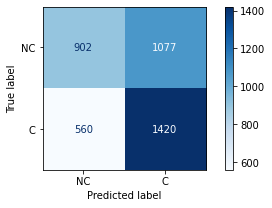

Train score : 0.6084332001775411
Test score  : 0.5865117453902501
              precision    recall  f1-score   support

       LEAVE     0.6170    0.4558    0.5243      1979
        STAY     0.5687    0.7172    0.6344      1980

    accuracy                         0.5865      3959
   macro avg     0.5928    0.5865    0.5793      3959
weighted avg     0.5928    0.5865    0.5793      3959

Roc =  0.6550974627528443


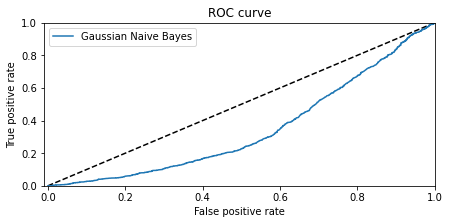

----------------------------------------
                      Precision    Recall        F1       ROC  Train Score  \
Gaussian Naive Bayes   0.616963  0.455786  0.524266  0.655097     0.608433   

                      Test Score  
Gaussian Naive Bayes    0.586512  


In [58]:
GNB = GaussianNB()
Res=plot_confMatrix(GNB,X_train,y_train,X_test, y_test,'Gaussian Naive Bayes')
all_scores = all_scores.append(Res)

### Bernoulli Naive Bayes

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


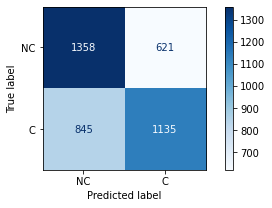

Train score : 0.6414558366622282
Test score  : 0.6297044708259661
              precision    recall  f1-score   support

       LEAVE     0.6164    0.6862    0.6495      1979
        STAY     0.6464    0.5732    0.6076      1980

    accuracy                         0.6297      3959
   macro avg     0.6314    0.6297    0.6285      3959
weighted avg     0.6314    0.6297    0.6285      3959

Roc =  0.6727795897325962


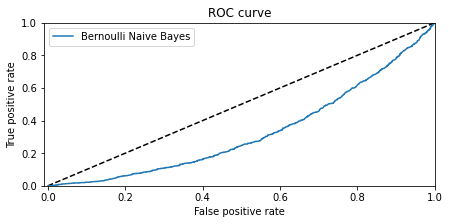

----------------------------------------
                       Precision    Recall       F1      ROC  Train Score  \
Bernoulli Naive Bayes   0.616432  0.686205  0.64945  0.67278     0.641456   

                       Test Score  
Bernoulli Naive Bayes    0.629704  


In [59]:
BNB =BernoulliNB()
Res=plot_confMatrix(BNB,X_train,y_train,X_test, y_test,'Bernoulli Naive Bayes')
all_scores = all_scores.append(Res)

### XGBOOST

In [60]:

param_grid=  { 'max_depth' : [3,4,5] , 
               'learning_rate': [0.1,0.01,0.05],
               'gamma' : [0,0.25,1.0] , 
               'reg_lambda' : [0 , 1.0,10.0,] , 
               'scale_pos_weight': [1,3,5]}

grid = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic',use_label_encoder=False,eval_metric='logloss'), param_grid=param_grid , cv=5,n_jobs=-1)
grid.fit(X_train,y_train)

grid.best_params_
T4=grid.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


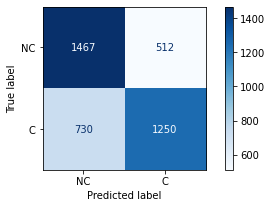

Train score : 0.7164669329782513
Test score  : 0.6862844152563778
              precision    recall  f1-score   support

       LEAVE     0.6677    0.7413    0.7026      1979
        STAY     0.7094    0.6313    0.6681      1980

    accuracy                         0.6863      3959
   macro avg     0.6886    0.6863    0.6853      3959
weighted avg     0.6886    0.6863    0.6853      3959

Roc =  0.7595903450880712


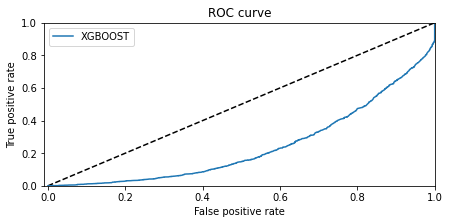

----------------------------------------
         Precision    Recall        F1      ROC  Train Score  Test Score
XGBOOST   0.667729  0.741283  0.702586  0.75959     0.716467    0.686284


In [61]:

XGB = xgb.XGBClassifier(objective='binary:logistic',use_label_encoder=False,eval_metric='logloss'
    ,max_depth=T4['max_depth']  ,learning_rate=T4['learning_rate'] 
    ,gamma=T4['gamma'],reg_lambda=T4['reg_lambda'],scale_pos_weight=T4['scale_pos_weight'])
Res=plot_confMatrix(XGB,X_train,y_train,X_test, y_test,'XGBOOST')
all_scores = all_scores.append(Res)

### Support Vector Machine (SVM)

In [62]:
clfsvm = svm.SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  

grid = GridSearchCV(clfsvm, param_grid=param_grid , cv=5,scoring='f1',n_jobs=-1)
grid.fit(X_train,y_train)
grid.best_params_
T5=grid.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan]
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


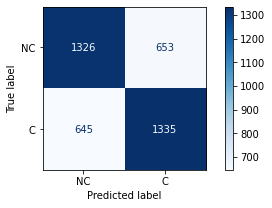

Train score : 0.7109631602308034
Test score  : 0.6721394291487749
              precision    recall  f1-score   support

       LEAVE     0.6728    0.6700    0.6714      1979
        STAY     0.6715    0.6742    0.6729      1980

    accuracy                         0.6721      3959
   macro avg     0.6721    0.6721    0.6721      3959
weighted avg     0.6721    0.6721    0.6721      3959

Roc =  0.7217544316331583


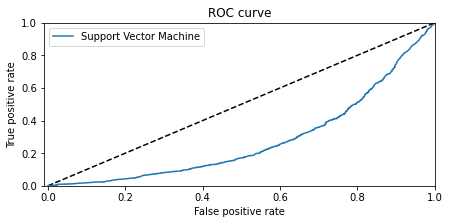

----------------------------------------
                        Precision    Recall        F1       ROC  Train Score  \
Support Vector Machine   0.672755  0.670035  0.671392  0.721754     0.710963   

                        Test Score  
Support Vector Machine    0.672139  


In [63]:

csvm = svm.SVC(C=T5['C']  ,gamma=T5['gamma'] ,kernel=T5['kernel'],probability=True)
Res=plot_confMatrix(csvm,X_train,y_train,X_test, y_test,'Support Vector Machine')
all_scores = all_scores.append(Res)

### Logistic Regression

In [64]:

clf = LogisticRegression() #Maximize the number of iterations so that it can converge

param_grid = {    'max_iter' : [50000],
                  'C': [0.1, 0.5, 1, 5, 10, 50, 100,150,200], 
                  "penalty":["l2"],
                  'dual' : [False]

                  }

grid = GridSearchCV(clf, param_grid=param_grid , cv=5,n_jobs=-1)
grid.fit(X_train,y_train)
grid.best_params_


{'C': 5, 'dual': False, 'max_iter': 50000, 'penalty': 'l2'}

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


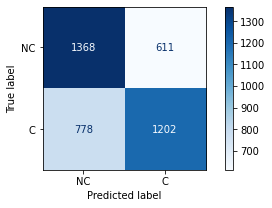

Train score : 0.6619618286728806
Test score  : 0.6491538267239202
              precision    recall  f1-score   support

       LEAVE     0.6375    0.6913    0.6633      1979
        STAY     0.6630    0.6071    0.6338      1980

    accuracy                         0.6492      3959
   macro avg     0.6502    0.6492    0.6485      3959
weighted avg     0.6502    0.6492    0.6485      3959

Roc =  0.6953823224667085


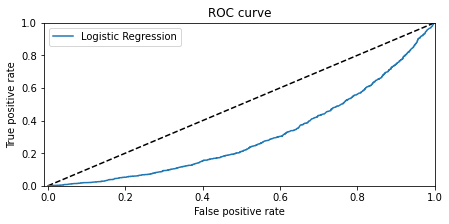

----------------------------------------
                     Precision    Recall        F1       ROC  Train Score  \
Logistic Regression   0.637465  0.691258  0.663273  0.695382     0.661962   

                     Test Score  
Logistic Regression    0.649154  


In [65]:
T6=grid.best_params_
clf = LogisticRegression(C=T6['C']  ,max_iter=T6['max_iter'] ,penalty=T6['penalty'],dual=T6['dual'])
Res=plot_confMatrix(clf,X_train,y_train,X_test, y_test,'Logistic Regression')
all_scores = all_scores.append(Res)

## Models Evaluation

LogisticRegression : 0.3046176775332915
XGBOOST : 0.24040965491192878
DecisionTree : 0.27914784530499537
RandomForest : 0.2466349957380781
KNN : 0.3008619545633189
GaussianNB : 0.34490253724715575
SVM : 0.2782455683668417
BNB : 0.32722041026740367


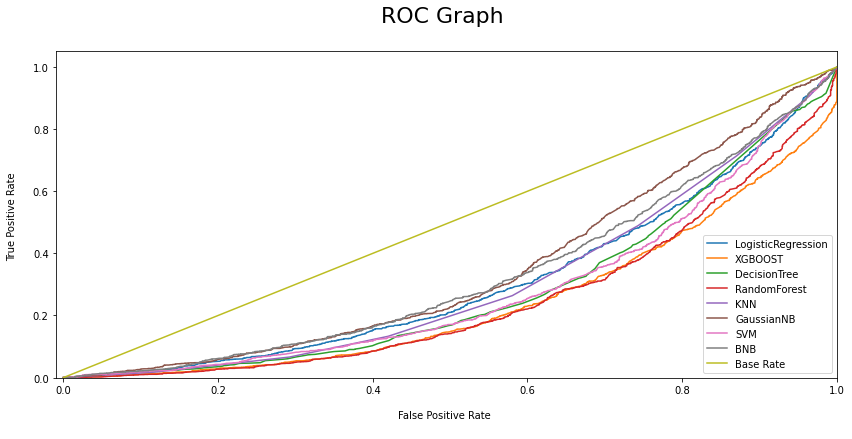

In [66]:
L=[clf,XGB,DT,RF,KNN,GNB,csvm,BNB]
List=['LogisticRegression','XGBOOST','DecisionTree','RandomForest' , "KNN" , "GaussianNB" , "SVM","BNB"]
plt.figure(figsize=(14, 6))


for i,j in zip(L,List): 
    i.fit(X_train, y_train) 
    probs = i.predict_proba(X_test) 
    probs = probs[:, 1] 
    classifier_roc_auc= roc_auc_score(y_test, probs)
    rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, i.predict_proba(X_test)[:,1], pos_label='LEAVE')
    plt.plot(rf_fpr, rf_tpr, label= j )
    print(j, ':' , auc(rf_fpr, rf_tpr))
    
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' )
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [67]:
all_scores.sort_values(by='F1', ascending=False)

,Precision,Recall,F1,ROC,Train Score,Test Score
Random Forest,0.659392,0.778676,0.714087,0.753533,0.738482,0.688305
Decision Tree,0.647284,0.770591,0.703576,0.721315,0.721438,0.675423
XGBOOST,0.667729,0.741283,0.702586,0.759590,0.716467,0.686284
KNN,0.636801,0.736230,0.682915,0.699138,0.721793,0.658247
Support Vector Machine,0.672755,0.670035,0.671392,0.721754,0.710963,0.672139
Logistic Regression,0.637465,0.691258,0.663273,0.695382,0.661962,0.649154
Bernoulli Naive Bayes,0.616432,0.686205,0.649450,0.672780,0.641456,0.629704
Gaussian Naive Bayes,0.616963,0.455786,0.524266,0.655097,0.608433,0.586512


##Testing Model

In [68]:
validation_data = pd.read_csv('/content/sample_data/training.csv')
validation_data.head()

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,C100000,zero,660.000000,19995.0,0,0,897338.0,False,4,3,160.0,155,1,1.2,15,very_unsat,little,considering,STAY
1,C100001,one,317.647059,31477.0,155,15,393396.0,True,0,1,100.0,245,27,2.7,4,unsat,little,considering,LEAVE
2,C100006,zero,208.695652,66742.0,0,13,937197.0,False,4,2,127.0,493,20,2.6,4,avg,very_little,considering,STAY
3,C100008,zero,265.017668,40864.0,183,0,986430.0,False,3,3,86.0,390,13,2.5,12,unsat,very_high,considering,LEAVE
4,C100010,one,440.000000,43321.5,200,0,394622.0,True,2,3,77.0,175,18,2.4,10,very_unsat,little,actively_looking_into_it,LEAVE


In [72]:
a= np.array(y_test)
predicted = np.array(DT.predict(X_test))
df_com=pd.DataFrame({"CUSTOMER_ID": validation_data['CUSTOMER_ID'],"CHURN_PROBABILITY": sorted(DT.predict_proba(X_test)[:,1], reverse= True),"ORIGINAL_CHURN_LABEL":a, "PREDICTED_CHURN_LABEL": predicted}, index= range(len(a)))
df_com.head(50)

,CUSTOMER_ID,CHURN_PROBABILITY,ORIGINAL_CHURN_LABEL,PREDICTED_CHURN_LABEL
0,C100000,1.0,STAY,STAY
1,C100001,1.0,STAY,STAY
2,C100006,1.0,LEAVE,STAY
3,C100008,1.0,LEAVE,LEAVE
4,C100010,1.0,STAY,LEAVE
5,C100011,1.0,LEAVE,LEAVE
6,C100012,1.0,LEAVE,LEAVE
7,C100013,1.0,LEAVE,LEAVE
8,C100014,1.0,STAY,STAY
9,C100015,1.0,LEAVE,LEAVE


In [73]:
df_com.to_csv('/content/sample_data/final_data.csv')